#### 1.1 Import Packages
We'll import all the relevant packages needed to execute our model training

In [121]:
# Basic Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling Packakges
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Load the data

In [122]:
df = pd.read_csv('C:/projects/mlproject/notebook/data/stud.csv')

##### Show Top 5 Rows

In [123]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Defining X and Y variables

In [124]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']

In [125]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [126]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [127]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

#### Separate Numerical features from Categorical features

In [128]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [129]:
# Create Column transformer with three(3) types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(  # transforms my predictor variables
    [
        ("OneHotEncoder", oh_transformer, cat_features), # applies OneHotEncoding on cat_features
         ("StandardScaler", num_transformer, num_features),  # standardizes num_features      
    ]
)


In [130]:
# Process predictor variables according to transformers
X = preprocessor.fit_transform(X)

In [131]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [132]:
X.shape

(1000, 19)

#### Train Test Split
It is customary to take a reasonable portion of our data and train our model with it. Later, we shall evaluate how well our model has learnt by introducing it to a brand new data it has not seen before(test data).

In [133]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [135]:


def evaluate_model(y_true, y_pred):
    """
    Evaluate a model's performance by calculating MAE, MSE, RMSE, and R².

    Parameters:
    - y_true (array-like): True target values.
    - y_pred (array-like): Predicted target values.

    Returns:
    - dict: A dictionary with MAE, RMSE, and R² scores.
    """
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_true,y_pred) # Mean squared Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)  # R² Score

    return mae, rmse, r2



In [136]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate Train dataset
    model_train_mae = evaluate_model(y_train, y_train_pred)
    model_train_rmse = evaluate_model(y_train, y_train_pred)
    model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_list.append(list(models.keys())[i])

    # Evaluate Test dataset
    model_test_mae = evaluate_model(y_test, y_test_pred)
    model_test_rmse = evaluate_model(y_test, y_test_pred)
    model_test_r2 = evaluate_model(y_test, y_test_pred)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse[0]))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae[1]))
    print("- R2 Score: {:.4f}".format(model_train_r2[2]))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse[0]))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae[1]))
    print("- R2 Score: {:.4f}".format(model_test_r2[2]))
    r2_list.append(model_test_r2[2])
    
    print('='*35)
    print('\n') 

Model performance for Training set
- Root Mean Squared Error: 4.2671
- Mean Absolute Error: 5.3243
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.2158
- Mean Absolute Error: 5.3960
- R2 Score: 0.8803


Model performance for Training set
- Root Mean Squared Error: 5.2063
- Mean Absolute Error: 6.5938
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.1579
- Mean Absolute Error: 6.5197
- R2 Score: 0.8253


Model performance for Training set
- Root Mean Squared Error: 4.2650
- Mean Absolute Error: 5.3233
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.2111
- Mean Absolute Error: 5.3904
- R2 Score: 0.8806


Model performance for Training set
- Root Mean Squared Error: 4.5167
- Mean Absolute Error: 5.7077
- R2 Score: 0.8555
----------------------------------
Model performance for Test set
- Root Me

#### R^2_Score

In [141]:
algorithm_values = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by='R2_Score',ascending=False)
algorithm_values

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850751
8,AdaBoost Regressor,0.849668
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.748868


#### Linear Regression

In [143]:
# Comparing the R^2 values of the algorithms, the linear, ridge performed best.
lm = LinearRegression(fit_intercept=True)
lm = lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("The accuracy of the model is %.2f" %score)

The accuracy of the model is 88.03


#### Plot y_test vs y_pred

Text(0, 0.5, 'Predicted Values')

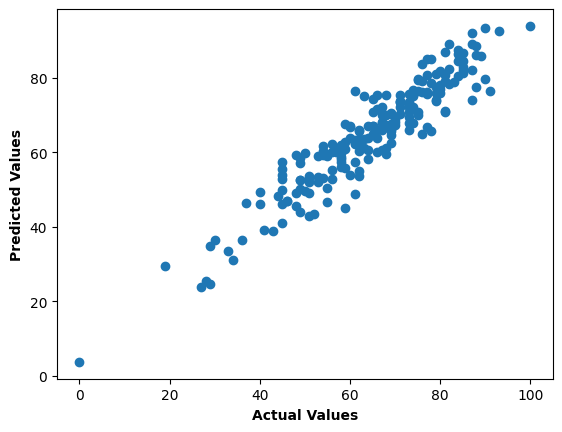

In [146]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values', fontweight='bold')
plt.ylabel('Predicted Values', fontweight='bold')

<Axes: xlabel='math score'>

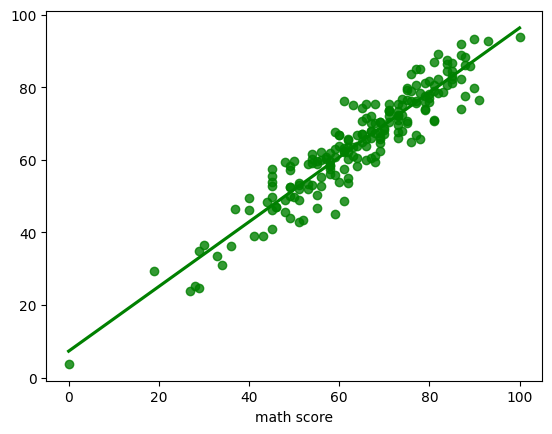

In [149]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green')

#### Difference Between Actual & Predicted Values
It suffices to know how close our predictions are to the actual values. In other words, how well is our model doing in terms of getting it right!

In [150]:
pred_df = pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual_Value,Predicted_Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
